# Maestría en Inteligencia Artificial Aplicada 

## Curso: Proyecto Integrador (Grupo 10) 

## Avance 1. Análisis exploratorio de datos
<br />

### Profesor titular  
#### Dra. Grettel Barceló Alonso 
#### Dr. Luis Eduardo Falcón Morales  
<br />

<table>
<tr>
    <th colspan="2">Equipo 19: Los Californios I</th>
</tr>
<tr>
    <td>Ernesto Zapata Garza</td><td>A00915255</td>
</tr>
<tr>
    <td>Rafael García Domínguez</td><td>A01328974</td>
</tr>
<tr>
    <td>Erik López Hernández</td><td>A00458875</td>
</tr>
</table>
<br />

##### 4 de mayo de 2025

El objetivo de este notebook es realizar un análisis exploratorio completo del guion de la serie <b>Los Californios</b>, con el fin de identificar patrones narrativos, personajes clave, agrupaciones temáticas y otras variables que permitan usar IA generativa en la producción de un tráiler audiovisual.

## Instalaciones necesarias

In [1]:
!pip install spacy


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!python -m spacy download es_core_news_md

     ---------------------------------------- 0.0/42.3 MB ? eta -:--:--
     ---------------------------------------- 0.5/42.3 MB 5.6 MB/s eta 0:00:08
     --------- ----------------------------- 10.5/42.3 MB 38.6 MB/s eta 0:00:01
     -------------- ------------------------ 16.0/42.3 MB 32.5 MB/s eta 0:00:01
     ----------------- --------------------- 18.6/42.3 MB 28.0 MB/s eta 0:00:01
     ------------------- ------------------- 20.7/42.3 MB 23.0 MB/s eta 0:00:01
     --------------------- ----------------- 23.3/42.3 MB 23.4 MB/s eta 0:00:01
     ------------------------ -------------- 26.2/42.3 MB 20.3 MB/s eta 0:00:01
     --------------------------- ----------- 29.9/42.3 MB 20.2 MB/s eta 0:00:01
     ----------------------------- --------- 32.5/42.3 MB 19.1 MB/s eta 0:00:01
     --------------------------------- ----- 36.7/42.3 MB 19.3 MB/s eta 0:00:01
     --------------------------------------  42.2/42.3 MB 20.0 MB/s eta 0:00:01
     --------------------------------------- 42.3


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install transformers


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install torch


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install huggingface_hub[hf_xet]


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip3 install emoji==0.6.0


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install deep-translator


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install sentence_transformers


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Construcción inicial del dataframe

In [9]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path
import spacy
from collections import Counter

# Cargar modelo de NLP
nlp = spacy.load('es_core_news_md')

In [10]:
# Carga y limpieza del guion
ruta_guion = Path('../data/LosCaliforniosScript.txt')
with open(ruta_guion, encoding='utf-8') as f:
    guion_crudo = f.read()

# Separación preliminar por escenas
escenas = re.split(r'\n\(\d+\)\s+(EXT\.|INT\.)', guion_crudo)
escenas = [e.strip() for e in escenas if len(e.strip()) > 100]

df = pd.DataFrame({'escena_texto': escenas})
df['num_palabras'] = df['escena_texto'].apply(lambda x: len(x.split()))
df.head()

,escena_texto,num_palabras
0,Los Californios\n1\nAutor. Carlos Peralta Dávi...,5665
1,DESIERTO DE SONORA Y ARIZONA – AMANECER\n\nImá...,594
2,"2465 34TH AVE, OAKLAND – DÍA\n\n\nSOBREPUESTO\...",1069
3,"MARKET STREET, SAN FRANCISCO - DÍA\nLa carreta...",187
4,CALIFORNIA STREET SAN FRANCISCO- DÍA\n\n\nLa c...,97


In [11]:
# Extracción de personajes con NLP
df['doc'] = df['escena_texto'].apply(nlp)
df['personajes'] = df['doc'].apply(lambda d: list(set([ent.text for ent in d.ents if ent.label_ == 'PER'])))

from collections import Counter

personajes_todos = df['personajes'].explode()
conteo_personajes = Counter(personajes_todos)

personajes_filtrados = [p for p, c in conteo_personajes.items() if c >= 5 and len (p.split()) <= 3]
df['personajes_filtrados'] = df['personajes'].apply(lambda lista: [p for p in lista if p in personajes_filtrados])

df[['escena_texto', 'personajes_filtrados']].head()

,escena_texto,personajes_filtrados
0,Los Californios\n1\nAutor. Carlos Peralta Dávi...,"[Mariana, Zoey, Pablo, Josefa, Josefa Ramos, M..."
1,DESIERTO DE SONORA Y ARIZONA – AMANECER\n\nImá...,[]
2,"2465 34TH AVE, OAKLAND – DÍA\n\n\nSOBREPUESTO\...","[Zoey, Pablo, Peralta, Luis María, San Antonio]"
3,"MARKET STREET, SAN FRANCISCO - DÍA\nLa carreta...",[Luis María]
4,CALIFORNIA STREET SAN FRANCISCO- DÍA\n\n\nLa c...,[]


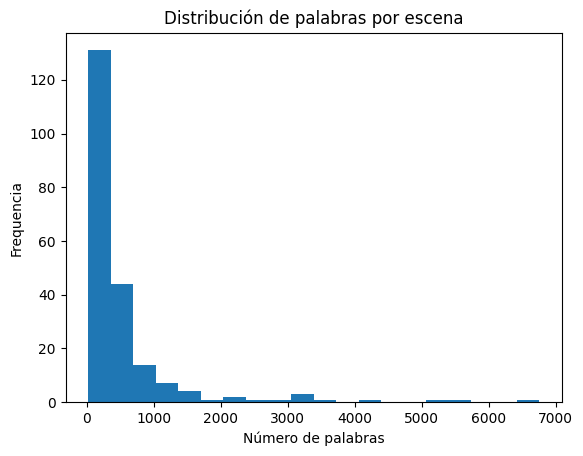

In [12]:
# Visualización: distribución de longitud de escenas
plt.hist(df['num_palabras'], bins=20)
plt.title("Distribución de palabras por escena")
plt.xlabel("Número de palabras")
plt.ylabel("Frequencia")
plt.show()

## Clasificación automática de emociones por escena

In [ ]:
from huggingface_hub import login
login('TOKEN')

c:\Users\ganod\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
from transformers import pipeline
from deep_translator import GoogleTranslator

emotion_classifier = pipeline('text-classification', model='j-hartmann/emotion-english-distilroberta-base', top_k=1, device=-1)
translator = GoogleTranslator(source='es', target='en')

def detectar_emocion(texto):
    try:
        oraciones = re.split(r'[.!?]', texto)
        entrada = ' '.join(oraciones[:5]).strip()[:300]
        entrada_en = translator.translate(entrada)
        result = emotion_classifier(entrada_en)
        return result[0][0].get('label', 'desconocido')
    except Exception as e:
        print(f'Error:', e)
        return 'desconocido'
    
df['emocion'] = df['escena_texto'].apply(detectar_emocion)
df[['escena_texto', 'emocion']].head()

Device set to use cpu


,escena_texto,emocion
0,Los Californios\n1\nAutor. Carlos Peralta Dávi...,neutral
1,DESIERTO DE SONORA Y ARIZONA – AMANECER\n\nImá...,anger
2,"2465 34TH AVE, OAKLAND – DÍA\n\n\nSOBREPUESTO\...",joy
3,"MARKET STREET, SAN FRANCISCO - DÍA\nLa carreta...",joy
4,CALIFORNIA STREET SAN FRANCISCO- DÍA\n\n\nLa c...,fear


In [15]:
df['emocion'].value_counts()

emocion
fear       107
joy         39
sadness     20
neutral     19
anger       15
disgust     13
Name: count, dtype: int64

## Clustering temático con Sentence Transformers

In [16]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

model = SentenceTransformer('distiluse-base-multilingual-cased-v1', device='cpu')
embeddings = model.encode(df['escena_texto'].tolist())
kmeans = KMeans(n_clusters=5, random_state=42)
df['tema_cluster'] = kmeans.fit_predict(embeddings)
df[['tema_cluster', 'escena_texto']].groupby('tema_cluster').head(1)

,tema_cluster,escena_texto
0,3,Los Californios\n1\nAutor. Carlos Peralta Dávi...
1,1,DESIERTO DE SONORA Y ARIZONA – AMANECER\n\nImá...
3,2,"MARKET STREET, SAN FRANCISCO - DÍA\nLa carreta..."
14,4,FRENTE IGLESIA – TUBAC SONORA – DÍA\n\nSOBREPU...
18,0,"CASA DE LA FAMILIA – CONTINUA\n\n\nLa HIJA, es..."


## Matriz de coaparición de personajes

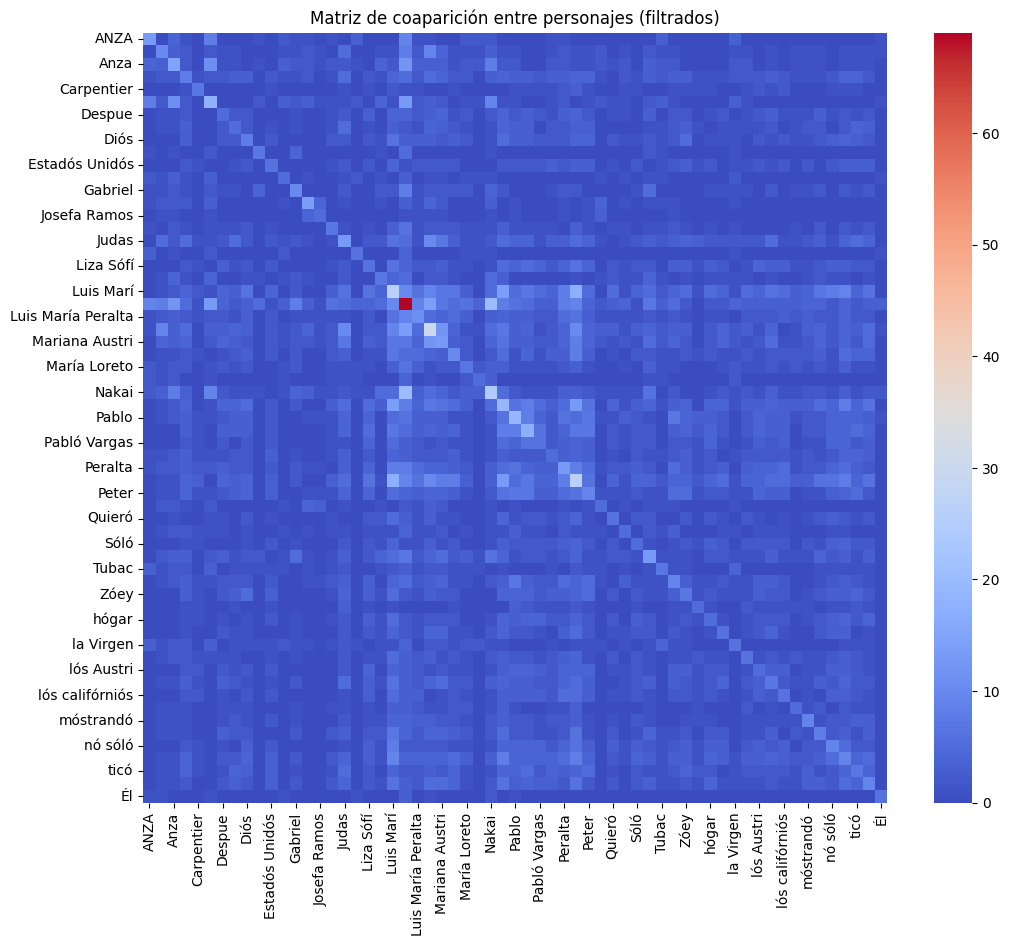

In [17]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
personajes_bin = mlb.fit_transform(df['personajes_filtrados'])
df_personajes = pd.DataFrame(personajes_bin, columns=mlb.classes_)
coaparicion = df_personajes.T.dot(df_personajes)
plt.figure(figsize=(12, 10))
sns.heatmap(coaparicion, cmap="coolwarm", annot=False)
plt.title("Matriz de coaparición entre personajes (filtrados)")
plt.show()

## Limpieza y tratamiento de valores nulos o atípicos

In [18]:
df['escena_text'] = df['escena_texto'].str.strip()
print('Valores nulos por columna: ')
print(df.isnull().sum())
df.fillna("desconocido", inplace=True)

Valores nulos por columna: 
escena_texto            0
num_palabras            0
doc                     0
personajes              0
personajes_filtrados    0
emocion                 0
tema_cluster            0
escena_text             0
dtype: int64


## Conclusiones del Análisis Exploratorio

In [19]:
print('Total de escenas:')
print(len(df))

Total de escenas:
213


In [20]:
print('\nEscenas más extensas:')
print(df.sort_values(by='num_palabras', ascending=False).head(5)[['num_palabras', 'escena_texto']])


Escenas más extensas:
     num_palabras                                       escena_texto
169          6755  MUELLE DEL RANCHO SAN ANTONIO – EAST BAY- DÍA\...
0            5665  Los Californios\n1\nAutor. Carlos Peralta Dávi...
160          5272  CASA GUBERNATORIAL - SALÓN PRINCIPAL - NOCHE\n...
167          4326  MOANING CAVERN - NOCHE\n \nVisual: La entrada ...
185          3417  ÁREA DESOLADA EN EL CENTRO DE SAN FRANCISCO - ...


In [21]:
print('\nDistribución de emociones:')
print(df['emocion'].value_counts())


Distribución de emociones:
emocion
fear       107
joy         39
sadness     20
neutral     19
anger       15
disgust     13
Name: count, dtype: int64


In [22]:
print('\nTop personajes:')
print(df['personajes_filtrados'].explode().value_counts().head(10))


Top personajes:
personajes_filtrados
Luis María    69
Mariana       30
Luis Marí     26
Peró          26
Nakai         24
Pablo         19
Nó            19
De Anza       18
Pabló         17
Anza          15
Name: count, dtype: int64


In [23]:
# Calcular datos necesarios para el dashboard

# Escenas por personaje (Top 10)
personajes_escenas = df['personajes_filtrados'].explode().value_counts().head(10)

# Emociones detectadas
emociones = df['emocion'].value_counts()

# Clusters temáticos (si existe esa columna)
if 'tema_cluster' in df.columns:
    temas = df['tema_cluster'].value_counts().sort_index()
else:
    temas = pd.Series()


C:\Users\ganod\AppData\Local\Temp\ipykernel_7060\497292836.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emociones.values, y=emociones.index, ax=axs[0, 1], palette="pastel")
C:\Users\ganod\AppData\Local\Temp\ipykernel_7060\497292836.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temas.index, y=temas.values, ax=axs[1, 0], palette="muted")


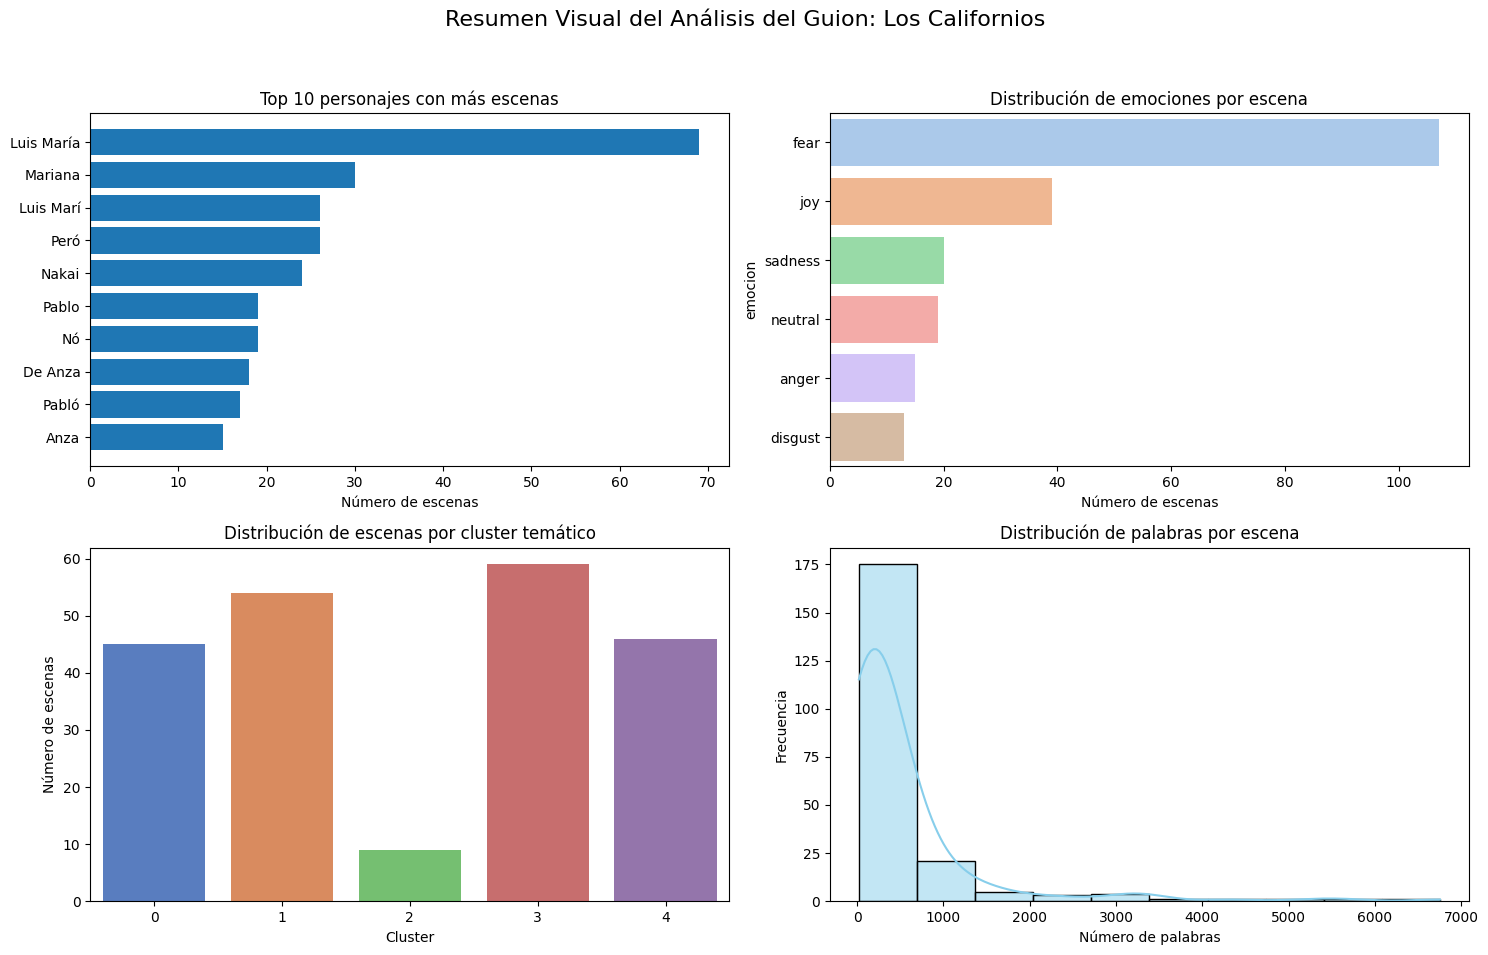

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Resumen Visual del Análisis del Guion: Los Californios", fontsize=16)

# Gráfico 1: Top personajes
axs[0, 0].barh(personajes_escenas.index[::-1], personajes_escenas.values[::-1])
axs[0, 0].set_title("Top 10 personajes con más escenas")
axs[0, 0].set_xlabel("Número de escenas")

# Gráfico 2: Emociones
sns.barplot(x=emociones.values, y=emociones.index, ax=axs[0, 1], palette="pastel")
axs[0, 1].set_title("Distribución de emociones por escena")
axs[0, 1].set_xlabel("Número de escenas")

# Gráfico 3: Clusters temáticos
sns.barplot(x=temas.index, y=temas.values, ax=axs[1, 0], palette="muted")
axs[1, 0].set_title("Distribución de escenas por cluster temático")
axs[1, 0].set_xlabel("Cluster")
axs[1, 0].set_ylabel("Número de escenas")

# Gráfico 4: Longitud de escenas
sns.histplot(df['num_palabras'], bins=10, kde=True, ax=axs[1, 1], color='skyblue')
axs[1, 1].set_title("Distribución de palabras por escena")
axs[1, 1].set_xlabel("Número de palabras")
axs[1, 1].set_ylabel("Frecuencia")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
